In [98]:
import urllib.request 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

train_data_path = 'https://raw.githubusercontent.com/Slimcent/Machine_Learning_Datasets/main/ML/mobile_price_train.csv'
test_data_path = 'https://raw.githubusercontent.com/Slimcent/Machine_Learning_Datasets/main/ML/mobile_price_test.csv'

def download_read_data(path):
    

    """
    Function to retrieve data from the data paths
    And to read the data as a pandas dataframe
  
    To return the dataframe
    """ 
    # Only retrieve the directory of the data

    
    data_path =  urllib.request.urlretrieve(path)[0]
    data = pd.read_csv(str(data_path))

    return data

In [102]:
# Getting train data 

mobile_train = download_read_data(train_data_path)

In [103]:
# first five rows of the data

mobile_train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [104]:
# Looking at tail (last rows) of the data 

mobile_train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [105]:
# Getting test data 

mobile_test = download_read_data(test_data_path)

In [106]:
# Looking at head (first two rows) of the data

mobile_test.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0


In [107]:
mobile_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [108]:
# Checking the number of data points/size of the data
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(mobile_train), len(mobile_test)))

The size of training data is: 2000 
The size of testing data is: 1000


In [109]:
# Checking the number of features
len(mobile_train.columns)

21

In [110]:
train_data = mobile_train.copy()

In [111]:
mobile_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [112]:
# Checking missing values

mobile_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [113]:
# Checking the relationship between prince_range and other variables

correlation = mobile_train.corr()
correlation['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

<Axes: >

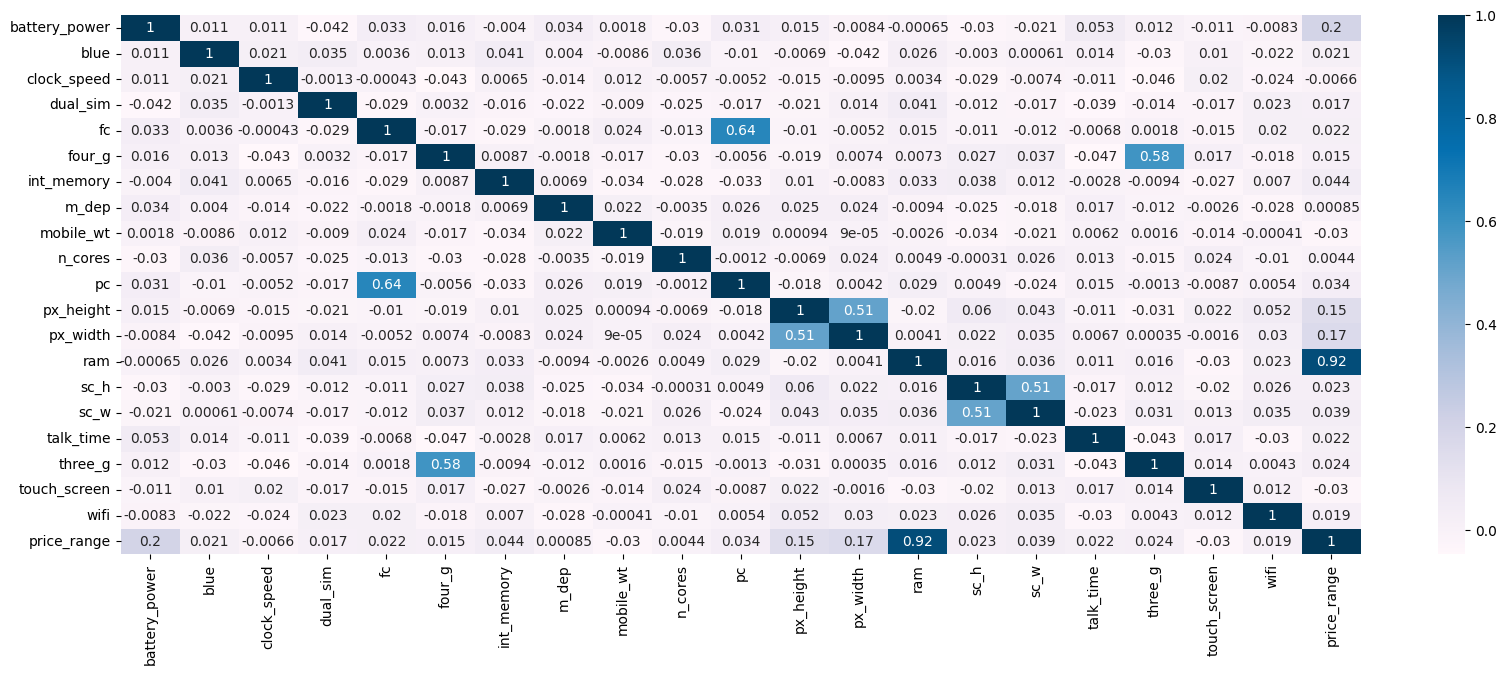

In [114]:
# Visualizing correlation

plt.figure(figsize=(20,7))
sns.heatmap(correlation, annot=True, cmap='PuBu')

In [115]:
# Checking the values of price_range
# sorted the count to start from 0

# mobile_train['price_range'].value_counts()

sorted_counts = mobile_train['price_range'].value_counts().sort_index()
print(sorted_counts)

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64


Text(0.5, 1.0, 'Mobile Price Ranges')

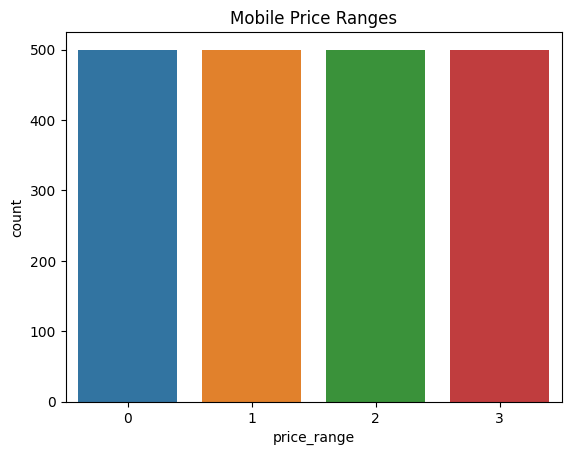

In [116]:
# Visualizing price_range values

sns.countplot(
    x = "price_range", 
    data = mobile_train
)

plt.title("Mobile Price Ranges")

Text(0.5, 1.0, 'Number of Cores')

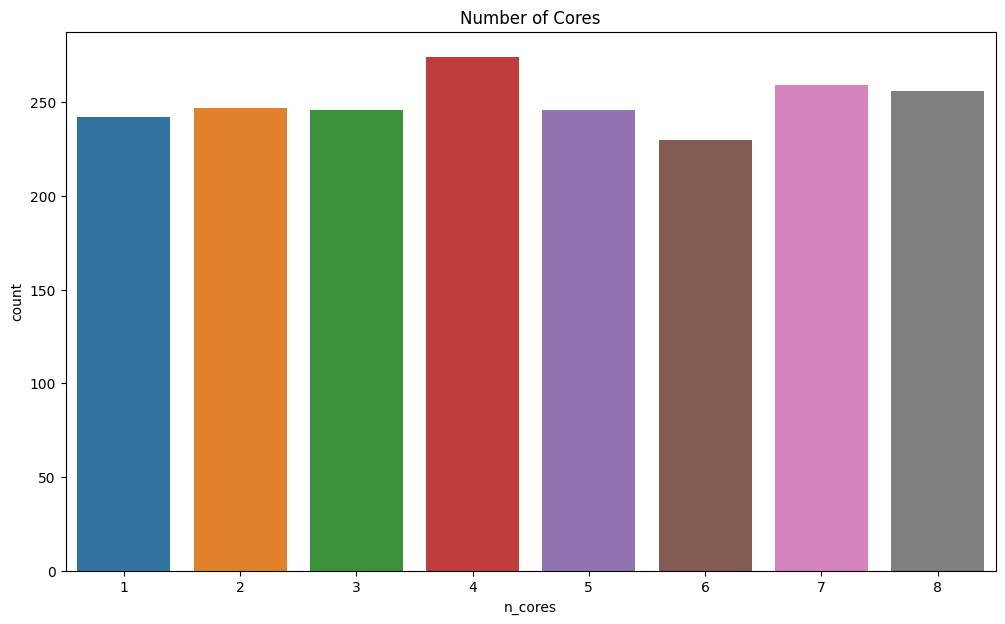

In [117]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores')
plt.title('Number of Cores')

Here, we wanrt to get the relationship between the n_cores and the the price_range
For each nunber of core, we want to get the number of phones that fall in that core category within each price range.

For instance, in core 1, we want to get the number of phones with 1 core for each price ranges (0 to 3)

Text(0.5, 1.0, 'Number of Cores')

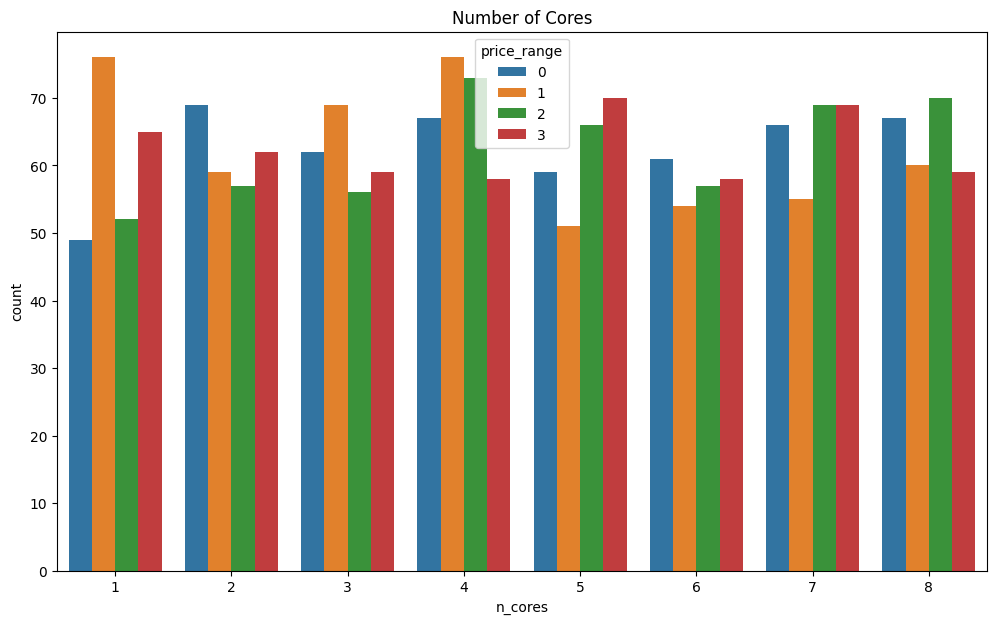

In [118]:
plt.figure(figsize=(12,7))

sns.countplot(data=mobile_train, x='n_cores', hue='price_range')
plt.title('Number of Cores')

Lets explore the features of our dataset

Text(0.5, 1.0, 'Distribution of Mobile Weights')

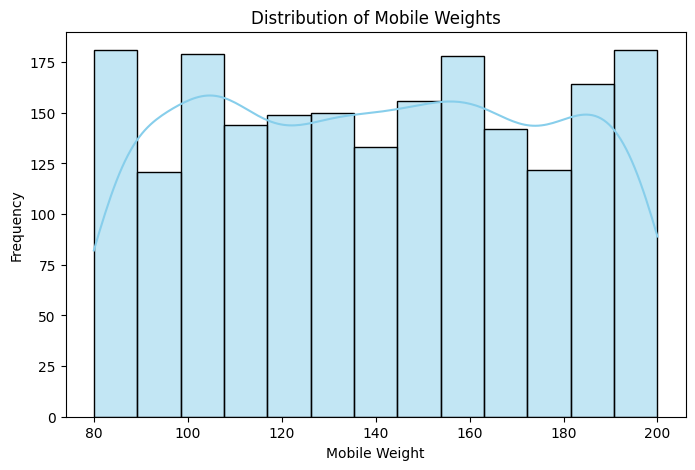

In [119]:
plt.figure(figsize=(8, 5))

sns.histplot(data=mobile_train, x='mobile_wt', kde=True, color='skyblue')  

# Adding labels and title
plt.xlabel('Mobile Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Mobile Weights')

<Axes: xlabel='mobile_wt', ylabel='Count'>

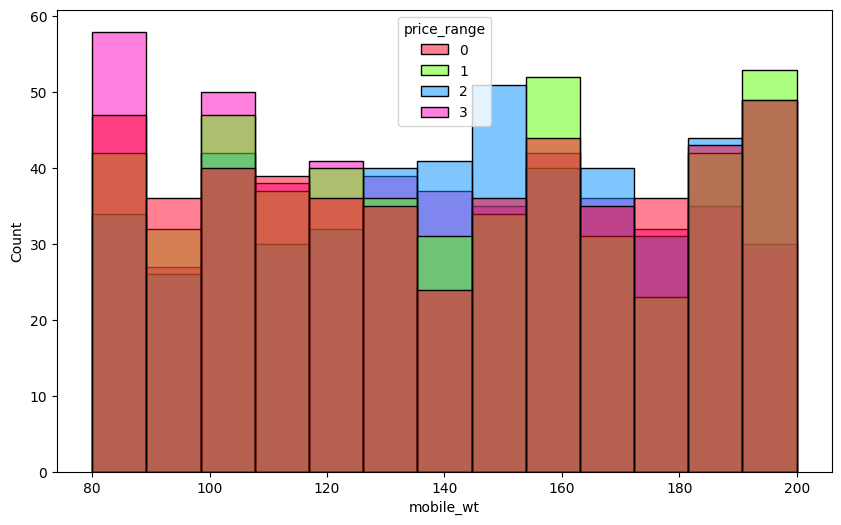

In [120]:
plt.figure(figsize=(10,6))

sns.histplot(data=mobile_train, x='mobile_wt', palette='gist_rainbow', hue='price_range')

C:\Users\obinn\AppData\Local\Temp\ipykernel_1772\724314852.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=mobile_train, x='ram', kde=True, palette='PRGn')


Text(0.5, 1.0, 'Distribution of Ram')

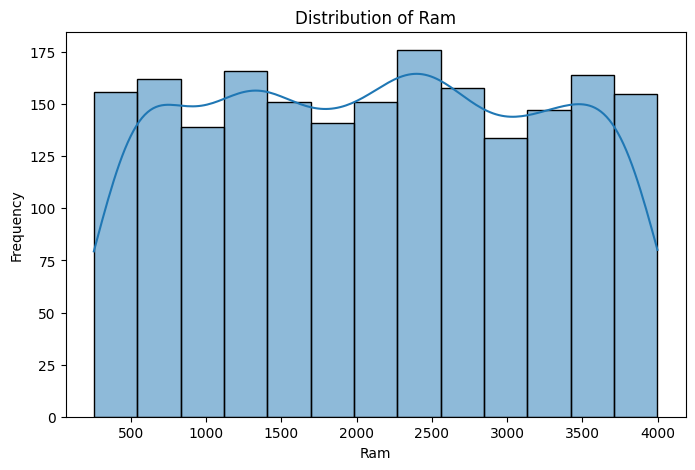

In [121]:
plt.figure(figsize=(8, 5))

sns.histplot(data=mobile_train, x='ram', kde=True, palette='PRGn')  

# Adding labels and title
plt.xlabel('Ram')
plt.ylabel('Frequency')
plt.title('Distribution of Ram')


Text(0.5, 1.0, 'Relationship between Ram and Price_Range')

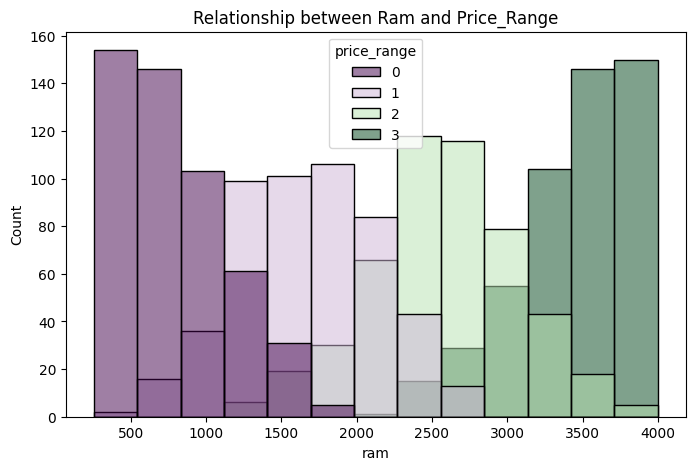

In [122]:
plt.figure(figsize=(8,5))

sns.histplot(data=mobile_train, x='ram', palette='PRGn', hue='price_range')
plt.title('Relationship between Ram and Price_Range')

<Axes: xlabel='n_cores', ylabel='ram'>

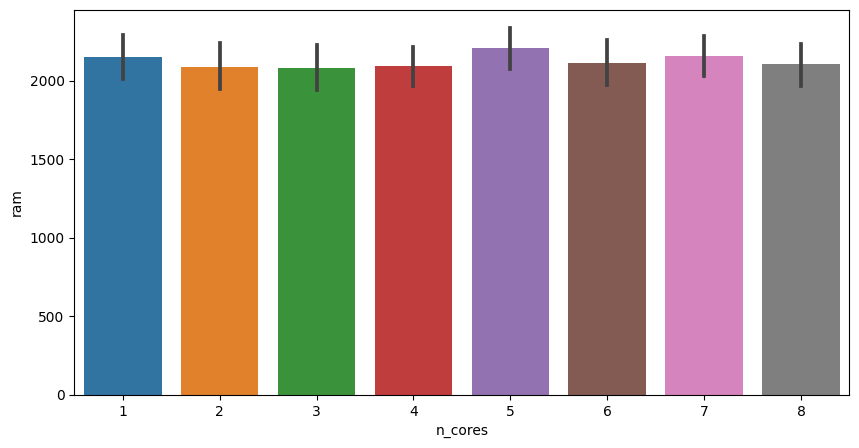

In [123]:
plt.figure(figsize=(10,5))

sns.barplot(data=mobile_train, x='n_cores', y='ram')

Text(0.5, 1.0, 'Front Camera Vs Primary Camera')

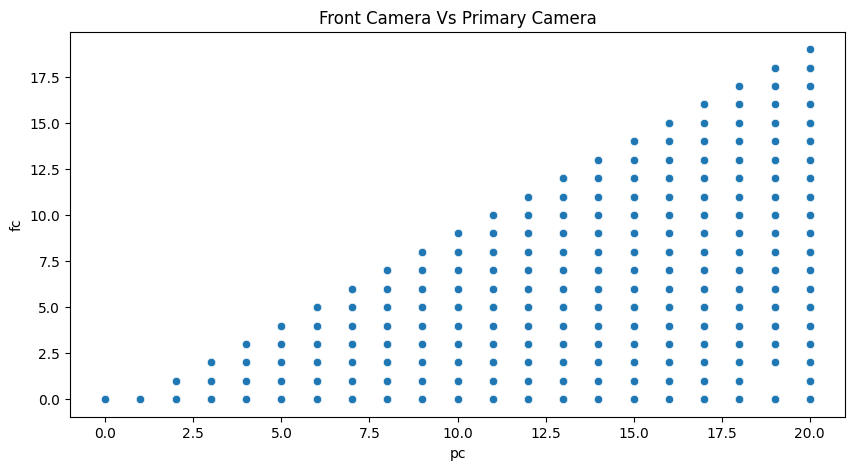

In [124]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=mobile_train, x='pc', y='fc')
plt.title('Front Camera Vs Primary Camera')

<Axes: xlabel='px_height', ylabel='px_width'>

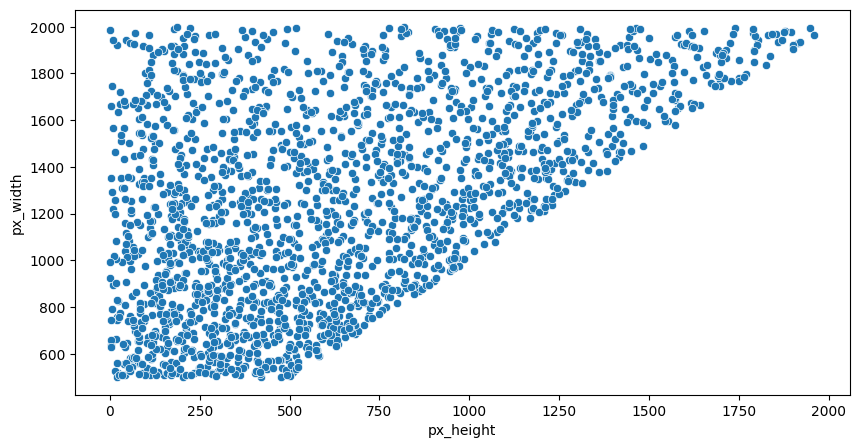

In [125]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=mobile_train, x='px_height', y='px_width')

<Axes: xlabel='battery_power', ylabel='talk_time'>

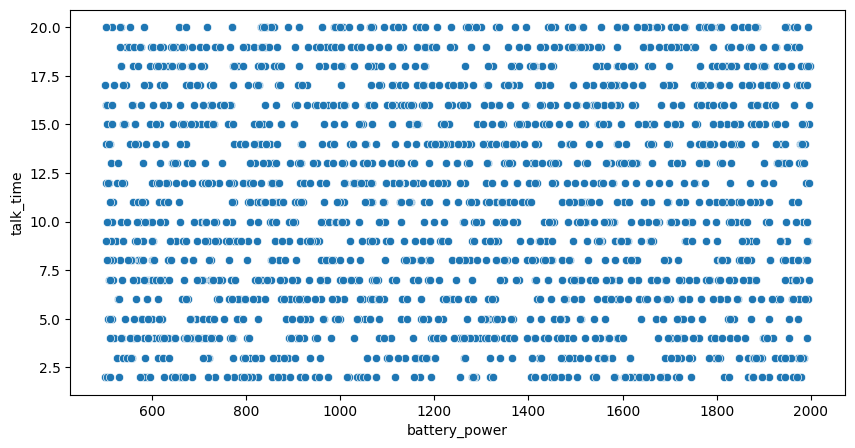

In [127]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=mobile_train, x='battery_power', y='talk_time')

Exploring Categorical Features

The number of mobiles that have bluetooth: 990
The number of mobiles that don't have bluetooth: 1010


<Axes: ylabel='count'>

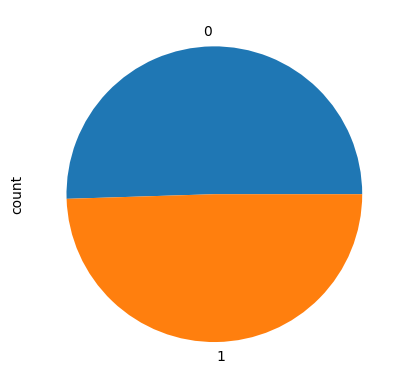

In [128]:
# Displaying number of phones which have or don't have bluetooth 
blue_count = mobile_train['blue'].value_counts()

print("The number of mobiles that have bluetooth: {}\nThe number of mobiles that don't have bluetooth: {}".format(blue_count[1], blue_count[0]))

blue_count.plot(kind='pie')

The number of mobiles that have Wifi: 1014
The number of mobiles that don't have Wifi: 986


<Axes: ylabel='count'>

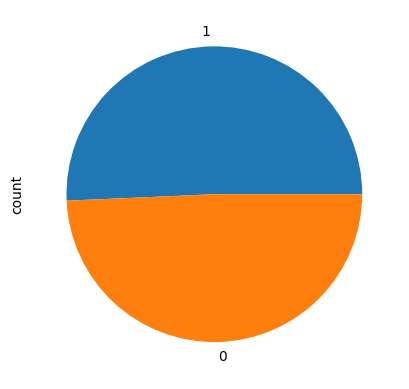

In [129]:
# Displaying number of phones which have or don't have wifi
wifi_count = mobile_train['wifi'].value_counts()

print("The number of mobiles that have Wifi: {}\nThe number of mobiles that don't have Wifi: {}".format(wifi_count[1], wifi_count[0]))

wifi_count.plot(kind='pie')

The number of mobiles that have dual sim capacity: 1019
The number of mobiles that don't have dual sim capacity: 981


<Axes: ylabel='count'>

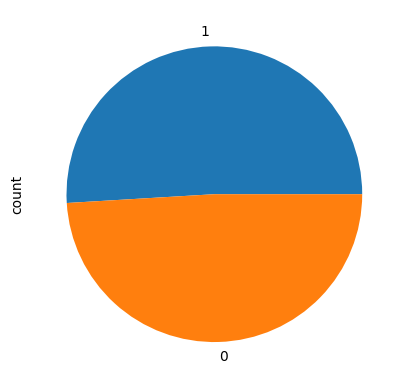

In [130]:
# Displaying number of phones which have or don't have dual simcards
sim_count = mobile_train['dual_sim'].value_counts()

print("The number of mobiles that have dual sim capacity: {}\nThe number of mobiles that don't have dual sim capacity: {}".format(sim_count[1], sim_count[0]))

sim_count.plot(kind='pie')

The number of mobiles that have 3G capacity: 1523
The number of mobiles that don't have 3G capacity: 477


<Axes: ylabel='count'>

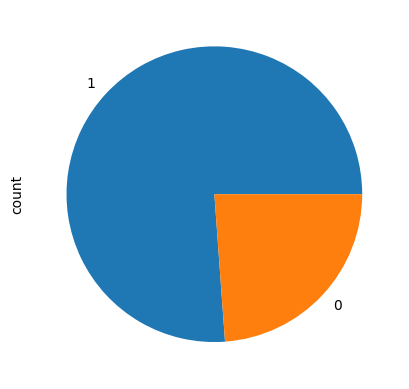

In [132]:
# Displaying number of phones which have or don't have 3g
count_3g = mobile_train['three_g'].value_counts()

print("The number of mobiles that have 3G capacity: {}\nThe number of mobiles that don't have 3G capacity: {}".format(count_3g[1], count_3g[0]))

count_3g.plot(kind='pie')

The number of mobiles that have 4G capacity: 1043
The number of mobiles that don't have 4G capacity: 957


<Axes: ylabel='count'>

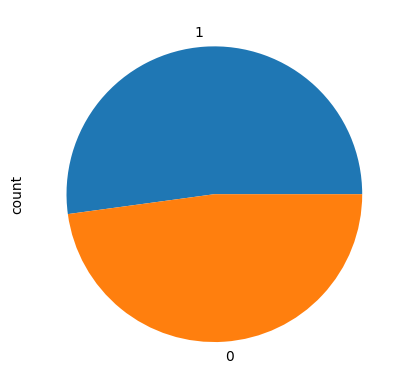

In [133]:
# Displaying number of phones which have or don't have 4g

count_4g = mobile_train['four_g'].value_counts()
print("The number of mobiles that have 4G capacity: {}\nThe number of mobiles that don't have 4G capacity: {}".format(count_4g[1], count_4g[0]))

count_4g.plot(kind='pie')

The number of mobiles that have touch screens: 1006
The number of mobiles that don't have touch screen: 994


<Axes: ylabel='count'>

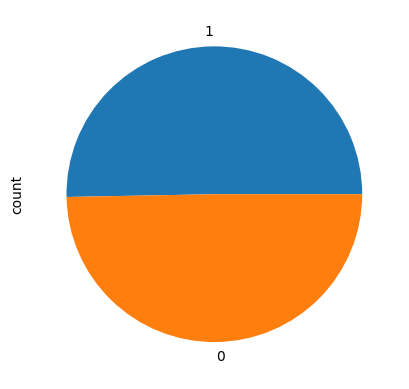

In [134]:
# Displaying number of phones which have or don't have touchscreen

touch_scr = mobile_train['touch_screen'].value_counts()

print("The number of mobiles that have touch screens: {}\nThe number of mobiles that don't have touch screen: {}".format(touch_scr[1], touch_scr[0]))

touch_scr.plot(kind='pie')

C:\Users\obinn\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


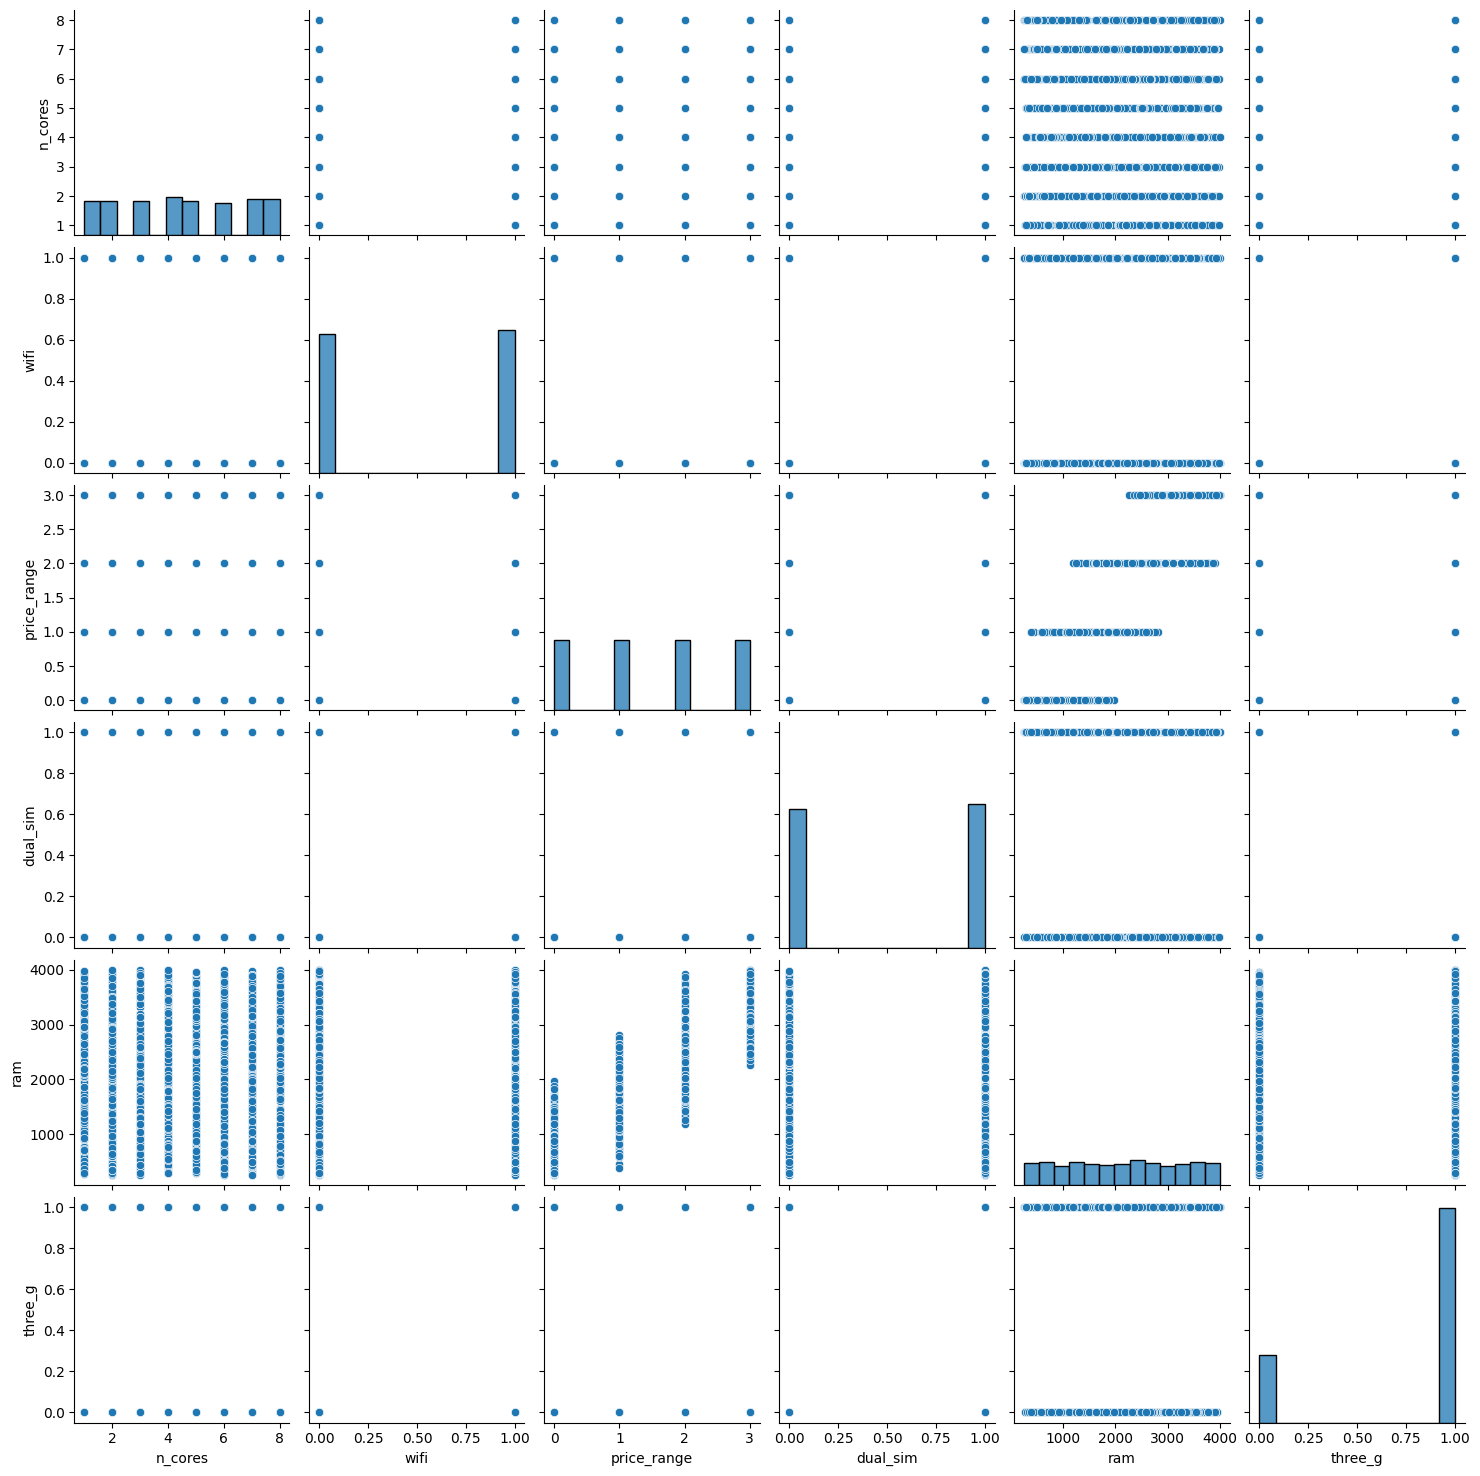

In [135]:
# sns.pairplot

sns.pairplot(mobile_train, vars=['n_cores', 'wifi', 'price_range', 'dual_sim', 'ram', 'three_g'])

Data Preprocessing
Preparing the data to be in proper format for ML models.

In [136]:
# Removed price_range from the training data

training_input_data = mobile_train.drop('price_range', axis=1) # x features used for training
training_labels = mobile_train['price_range'] # y feature to predict

Feature Scaling

Take numerical input data and return the normalized data

In [137]:
scaler = MinMaxScaler()

def scale_feats(num_input_data):

  normalized_data = scaler.fit_transform(num_input_data)

  return normalized_data

In [138]:
training_final = scale_feats(training_input_data)

Creating and Training a Logistic Regression Model

In [139]:
log_model = LogisticRegression()
log_model.fit(training_final, training_labels)

LogisticRegression()

Evaluationg the model

In [140]:
log_model.score(training_final, training_labels)

0.947

Checking out other models

In [141]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(training_final, training_labels)

SGDClassifier()

In [142]:
sgd_clf.score(training_final, training_labels)

0.7975

SGDClassifier didn't do too good.

In [143]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(training_final, training_labels)

DecisionTreeClassifier()

In [144]:
tree_clf.score(training_final, training_labels)

1.0

Wow! how can it be perfect, maybe the model is over fitted.
Decision tree classifier is more complex than our small training data.

Model Evaluation

In [145]:
# Let's hide warnings returned by cross validation.

import warnings
warnings.filterwarnings('ignore')

Evaluating our logistic regression classifier

In [146]:
from sklearn.model_selection import cross_val_score

# cv is the number of subsets/folds 

log_scores = cross_val_score(log_model, training_final, training_labels,
                         cv=10)

In [147]:
log_scores

array([0.915, 0.94 , 0.91 , 0.93 , 0.935, 0.94 , 0.92 , 0.925, 0.91 ,
       0.92 ])

In [148]:
log_scores.mean()

0.9245000000000001

Evaluating our SDG classifier

In [150]:
from sklearn.model_selection import cross_val_score

sgd_scores = cross_val_score(sgd_clf, training_final, training_labels,
                         cv=10)

In [151]:
sgd_scores

array([0.775, 0.725, 0.74 , 0.75 , 0.78 , 0.76 , 0.8  , 0.77 , 0.735,
       0.715])

In [152]:
sgd_scores.mean()

0.7550000000000001

In [ ]:
Evaluating our decision tree classifier

In [153]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(tree_clf, training_final, training_labels,
                         cv=10)

In [154]:
tree_scores

array([0.815, 0.84 , 0.86 , 0.82 , 0.86 , 0.84 , 0.825, 0.82 , 0.865,
       0.785])

In [155]:
tree_scores.mean()

0.833

In [156]:
from sklearn.model_selection import cross_val_predict

# cv is the number of subsets/folds 

predictions_on_train = cross_val_predict(log_model, training_final, training_labels,
                         cv=10)

Classification Performance Metrics

Confusion matrix
This shows the number of correct and incorrect predictions made by a classifier in all available classes

In [157]:
from sklearn.metrics import confusion_matrix

confusion_matrix(training_labels, predictions_on_train)

array([[488,  12,   0,   0],
       [ 31, 441,  28,   0],
       [  0,  35, 430,  35],
       [  0,   0,  10, 490]], dtype=int64)

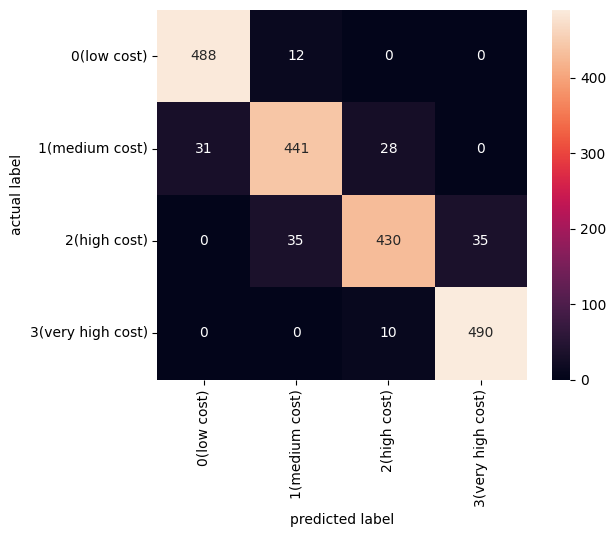

In [158]:
cm = confusion_matrix(training_labels, predictions_on_train)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'],
                        yticklabels=['0(low cost)', '1(medium cost)', '2(high cost)','3(very high cost)'])
plt.ylabel('actual label')
plt.xlabel('predicted label');

Accuracy
This is how good the model is at making correct predictions over the whole training set.

In [159]:
from sklearn.metrics import accuracy_score

accuracy_score(training_labels, predictions_on_train)

0.9245

Classification report

In [160]:
from sklearn.metrics import classification_report

print(classification_report(training_labels, predictions_on_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       500
           1       0.90      0.88      0.89       500
           2       0.92      0.86      0.89       500
           3       0.93      0.98      0.96       500

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

